<a href="https://colab.research.google.com/github/DestonSJU/IDS/blob/main/HW6/HW6_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. First I import the training and testing data (to import the data, first I had to upload the csv files to google colab). Next I create the cart classifier and display the decision tree. The first split of the decision tree is less than 660 fico score and greater than or equal to 660 fico score, next is less than 0.31 debt to income and greater than or equal to 0.31 debt to income, after that is less than 26000 request amount and greater than or equal to 26000 request amount, and finally less than 0.26 debt to incom and greater than or equal to 0.26 debt to income.

In [2]:
#Import data and create dataframe for training data
data <- read.csv("Loans_Training.csv")
trainingDF <- data
head(trainingDF, 10)

,Approval,Debt.to.Income.Ratio,FICO.Score,Request.Amount,Interest
,<lgl>,<dbl>,<int>,<int>,<dbl>
1,FALSE,0,397,1000,450
2,FALSE,0,403,500,225
3,FALSE,0,408,1000,450
4,FALSE,0,408,2000,900
5,FALSE,0,411,5000,2250
6,FALSE,0,413,5000,2250
7,FALSE,0,416,6000,2700
8,FALSE,0,421,2000,900
9,FALSE,0,422,12000,5400


In [3]:
#Import data and create dataframe for testing data
data <- read.csv("Loans_Test.csv")
testingDF <- data
head(testingDF, 10)

,Approval,Debt.to.Income.Ratio,FICO.Score,Request.Amount,Interest
,<lgl>,<dbl>,<int>,<int>,<dbl>
1,FALSE,0,413,2000,900
2,FALSE,0,449,1000,450
3,FALSE,0,454,6000,2700
4,FALSE,0,456,1000,450
5,FALSE,0,457,1000,450
6,FALSE,0,457,8000,3600
7,FALSE,0,459,8000,3600
8,FALSE,0,461,500,225
9,FALSE,0,461,6000,2700


In [18]:
#Install packages for cart classifier
install.packages("rpart")
install.packages("rattle")
install.packages("rpart.plot")
install.packages("RColorBrewer")

library(rpart)
library(rattle)
library(rpart.plot)
library(RColorBrewer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘XML’, ‘rpart.plot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



In [6]:
#Install C50 package
install.packages("C50")
library(C50)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’, ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’, ‘Cubist’, ‘partykit’





Classification tree:
rpart(formula = trainingDF[, "Approval"] ~ (trainingDF[, "Debt.to.Income.Ratio"] + 
    trainingDF[, "FICO.Score"] + trainingDF[, "Request.Amount"] + 
    trainingDF[, "Interest"]), data = trainingDF, method = "class", 
    control = rpart.control(cp = 0))

Variables actually used in tree construction:
[1] trainingDF[, "Debt.to.Income.Ratio"] trainingDF[, "FICO.Score"]          
[3] trainingDF[, "Request.Amount"]      

Root node error: 75066/150302 = 0.49943

n= 150302 

           CP nsplit rel error  xerror      xstd
1  5.6465e-01      0   1.00000 1.00000 0.0025823
2  1.2676e-01      1   0.43535 0.43547 0.0021306
3  3.1705e-03      2   0.30860 0.30999 0.0018682
4  9.6360e-04      4   0.30225 0.30357 0.0018523
5  6.3944e-04      7   0.29936 0.30232 0.0018491
6  5.6617e-04      8   0.29872 0.30139 0.0018468
7  4.5293e-04     10   0.29759 0.30048 0.0018445
8  3.6856e-04     11   0.29714 0.29986 0.0018429
9  2.9308e-04     15   0.29547 0.29850 0.0018395
10 1.5986e-

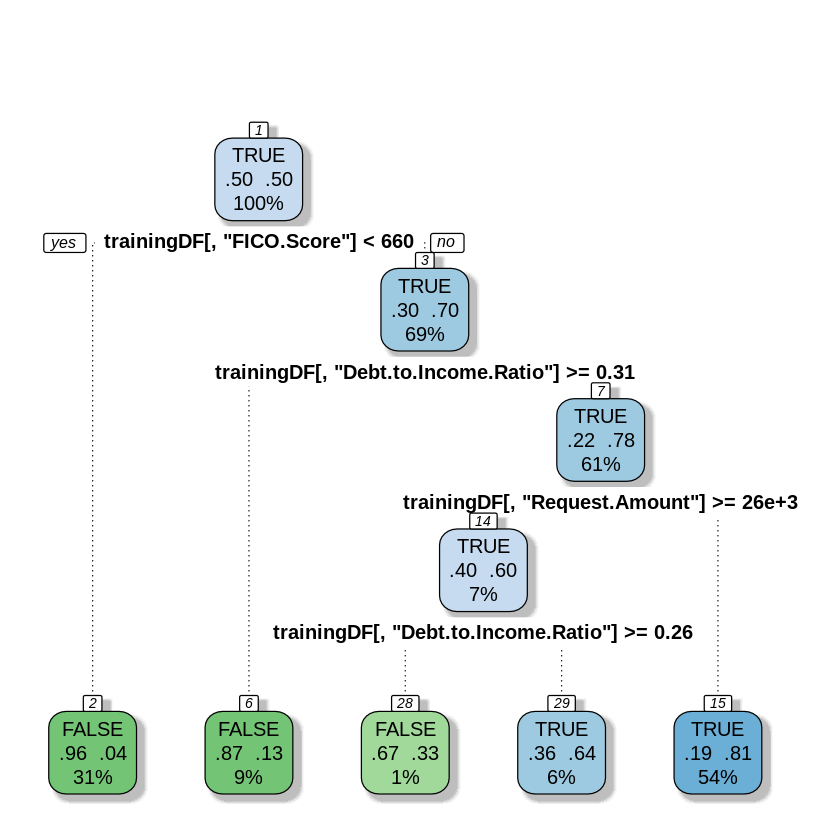

In [37]:
#Creates and plots the pruned decision tree
set.seed(1)
model <- rpart(trainingDF[,'Approval'] ~ (trainingDF[,'Debt.to.Income.Ratio'] + trainingDF[,'FICO.Score'] + trainingDF[,'Request.Amount'] + trainingDF[,'Interest'] ), data = trainingDF, method="class", control =rpart.control(cp=0))
#Prints the cp values to find a good value to use for pruning
printcp(model)
model2 <- prune(model, cp=0.001)
fancyRpartPlot(model2, caption = NULL)

2. Next I create the c5 classifier and display the decision tree. Looking at the splits, first is less than or equal to and greater than 0.31 debt to income, followed by less than or equal to and greater than 655 fico score, then less than or equal to and greater than 669 fico score, then less than or equal to and greater than 23000 request amount, then less than or equal to and greater than 661 fico score, followed by less than or equal to and greater than 0.25 debt to income, and finally less than or equal to and greater than 25000 request amount.

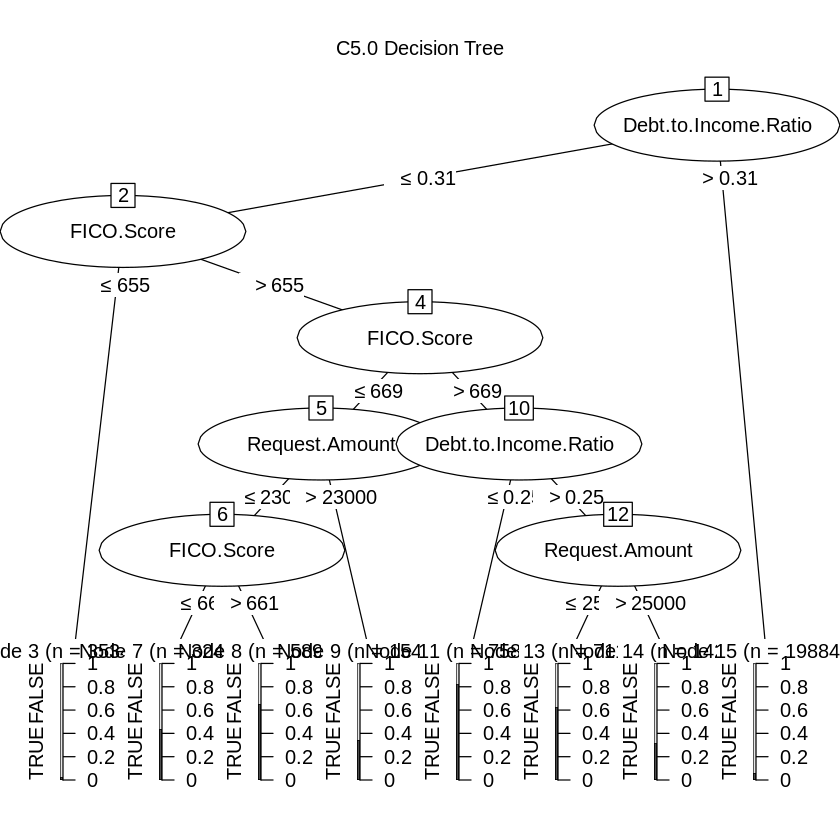

In [8]:
#Creates and prints the decision tree
model <- C5.0(input, output, control = C5.0Control(minCases = 1000))
plot(model, main="C5.0 Decision Tree")

3. One similarity between the two models is that in the decision trees neither one uses interest in any of the splits. One difference is when they use different attributes to split with. For example, the cart decision tree starts with fico score for its splits. while the c5 decision tree start with debt to income ratio. Another similarity between the two decision trees is while they use different attributes to split in different places, the values they use for each split are around the same for both models. For example, a value the cart classifier uses for a fico split is 660, while a value the c5 classifier uses for its fico split is 655.